In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [58]:
df_raw=pd.read_csv('ohe_data_reduce_cat_class.csv')
df_raw.shape
df=df_raw.copy()
df.shape

(7120, 108)

In [59]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# split dataset for training and testing
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


In [92]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Machine Learning Model Training
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [64]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [65]:
# linear regr.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7903837092682253, 64.89843531105606)

In [66]:
# Lasso 
from sklearn.linear_model import Lasso
lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8036372973672522, 62.813242204691534)

In [67]:
# svm
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) 
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.20638035840828184, 126.27806378079053)

In [68]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8904838616708619, 46.909496464083745)

In [69]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse}
              ],
             columns=['Model','Score','RMSE']))

                    Model     Score        RMSE
0       Linear Regression  0.790384   64.898435
1                   Lasso  0.803637   62.813242
2  Support Vector Machine  0.206380  126.278064
3           Random Forest  0.890484   46.909496


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_r2 = rfr.score(X_test, y_test)

print("Random Forest Regressor Metrics:")
print("R-squared (R2) Score:", rfr_r2)
print("Mean Absolute Error (MAE):", rfr_mae)
print("Mean Squared Error (MSE):", rfr_mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(rfr_mse))


Random Forest Regressor Metrics:
R-squared (R2) Score: 0.8834379694476646
Mean Absolute Error (MAE): 4.041228757022473
Mean Squared Error (MSE): 2342.073526457537
Root Mean Squared Error (RMSE): 48.39497418593729


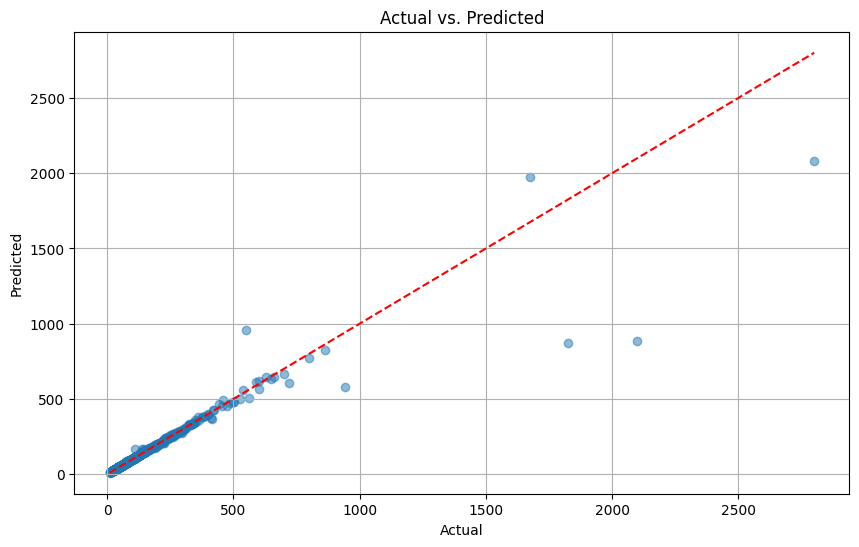

In [72]:
import matplotlib.pyplot as plt

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

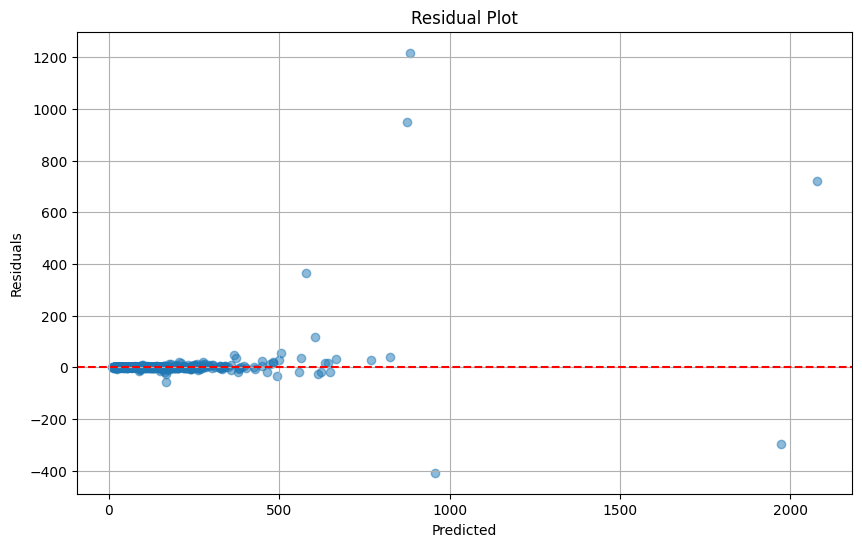

In [73]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [89]:
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
 
  x =np.zeros(len(X.columns)) 
 
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft
 
  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1
      
  if "availability"=="Ready To Move":
    x[8]=1
 
  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1

  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  
  return model.predict([x])[0] 

In [90]:
predict_house_price(model=rfr,
                    bath=3,
                    balcony=3,
                    total_sqft_int=1750,
                    bhk=3,
                    price_per_sqft=8514.285714,
                    area_type="Built-up Area",
                    availability="Ready To Move",
                    location="Whitefield")


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


149.34

In [75]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.00000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,0.032865,0.025702,0.022191,0.016292,0.016292,0.016292,0.015169,0.015169,0.014888,0.014466,0.01250,0.012219,0.012079,0.012079,0.011938,0.008567,0.007865,0.007725,0.007444,0.007444,0.007163,0.006882,0.006882,0.006601,0.006180,0.006039,0.005899,0.005899,0.005758,0.005478,0.005478,0.005478,0.005478,0.005337,0.0